# Assignment 7
### Do any five. 1,2,3,4,5

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. 

- What is the expected value of a single die roll? 
- What is the expected value of rolling two dice and adding the results together?
- What is the expected winnings of any gamble in European roulette?

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

## Answer to prob 1

- what's the expected value of a single die roll? 

The expected value is 3.5

$1 * 1/6 + 2* 1/6 + 3*1/6 + 4*1/6+5*1/6+6*1/6$

- What's the expected value of rolliing two dice and adding the results together?
```
2:1/36 => 2* 1/36
3: 2/36 => 3 * 2/36
4: 3/36 => 4 * 3/36
5: 4/36 => 5*4/36
6: 5/36 => 6 * 5/36
7: 6/36 => 7 * 6/36
8: 5/36 => 8 * 5/36
9: 4/36 => 9 * 4/36
10: 3/36 => 10 * 3/36
11: 2/36 => 11 * 2/36
12: 1/36 => 12 * 1/36
```
Sum all of the above 252/36 = 7, the expected value is 7


- what is the expected winning of any gamble in european roulette?

The european roulette has 37 pockets (including 0) while the payoff is 36/k, k is the number of your bets

> if you bet on k pockets, and if win, your expected payoff is 1 * 36/k * k/37 = 36/37

> if lose, 0 * (37-k)/37 = 0

> minus 1 to place the bet, the expected return is 36/37 -1 = -0.027

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?

The standard roll's expected value is 3.5 from previous calculation.

The bonus roll's expected value is 1/6 * (expected value of additional roll, which is also 3.5) = 1/6 * 3.5 = 0.5833

Sum these two, the expected value is 3.5 + 0.5833 = 4.0833

- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

The expected value is 4.2, calculation is below:

3.5 is expected value of a single roll

![roll_dice](src/roll_dice.png)

## 2. 
- Compute the expected value for a uniform random variable.
- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

Compute the expected value for a uniform random variable
$$
\int_0^1 x \times 1 dx =  \int_0^1 d \left\lbrace \frac{1}{2} x^2 \right\rbrace = \frac{1}{2}1^2 - \frac{1}{2}0^2 = \frac{1}{2}
$$

Show E(a+bX) = a+bE[X]


E[a+bX]=E[a]+E[bX]

- a is a constant, so $\mathbb{E}[a] = a$.

- b is a constant, so $E[bX]=bE[X]$.

E[a+bX]=a+bE[X]


In [5]:
def v(x):
    return np.sqrt(x)

rng = np.random.default_rng(seed=50)
x = rng.uniform(low=0, high=1, size = 1000)

print(f'the expected value of a transformed variable is: {np.mean(v(x))}')
print(f'the transfromation of expected value is: {v(np.mean(x))}')

the expected value of a transformed variable is: 0.6564696810907388
the transfromation of expected value is: 0.6982075327103909


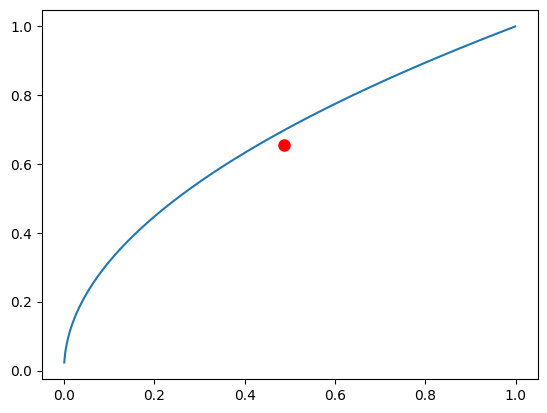

In [6]:
sns.lineplot(x=x, y=v(x))
plt.plot(np.mean(x),np.mean(v(x)), 'o', color='red', markersize=8)

## 3. 
- Compute the variance for a uniform random variable.
- Show that 
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$
$$
\mathbb{V}[a+bX] = b^2 \mathbb{V}[X]
$$
- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$ 

These properties get used all the time!


#### Answer to Prob 3
Compute the variance for a uniform random variable

the mean is 0.2 from previous questions

$$
\int_0^1 (x-.5)^2 \times 1 dx = \int_0^1 x^2 - x + .25 dx = \int_0^1 d\left\lbrace \frac{1}{3} x^3 - \frac{1}{2}x^2 + .25x \right\rbrace = \frac{1}{3}-\frac{1}{2}+\frac{1}{4} = \frac{1}{12}
$$

![vars](src/var2.png)

- show If $X \sim N(\mu, \sigma^2))$, then $a+bX \sim N(a+b\mu, b^2\sigma^2)$

A normal distribution is closed under affine transformations.
If $X∼N(μ,σ2)X \sim N(\mu, \sigma^2)X∼N(μ,σ2)$, then:

$Y = a + bX$

Compute mean:

$\mathbb{E}[Y] = a + b\mathbb{E}[X] = a + b\mu$.

Compute variance:

$\mathbb{V}[Y] = b^2 \mathbb{V}[X] = b^2 \sigma^2$.

So:

$Y \sim N(a+b\mu, b^2\sigma^2)$.

## 4.

- The **covariance** of $X$ and $Y$ is
$$
\text{cov}(X,Y) = \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{XY}(x,y) dxdy = \mathbb{E}_{XY}[ (x-\mu_X)(y-\mu_Y)]
$$
- Show that if $f_{XY}(x,y)=f_X(x)f_Y(y)$, then $\text{cov}(X,Y)=0$
- Provide an example (computation/simulation is fine) where $\text{cov}(X,Y)\approx 0$ but $f_{XY}(x,y)\neq 0$
- The covariance doesn't characterize joint random variables except in a few special cases: The covariance only captures the **linear** association between the two variables, not nonlinear associations.

- Show that if $f_{XY}(x,y)=f_X(x)f_Y(y)$, then $\text{cov}(X,Y)=0$

\begin{alignat*}{2}
\text{cov}(X,Y) &=& \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{X}(x)F_y(y) dxdy \\
&=& \int_{y} \left[ \int_{x} (x-\mathbb{E}[X])f_{X}(x) dx \right] (y-\mathbb{E}[Y])F_y(y)dy \\
&=& \int_{y} \left[ \int_{x} xf_{X}(x) dx-\mathbb{E}[X] \right] (y-\mathbb{E}[Y])F_y(y)dy \\
&=& \int_{y} \left[ \mathbb{E}[X]-\mathbb{E}[X] \right] (y-\mathbb{E}[Y])F_y(y)dy \\
&=& \int_{y} \left[ 0 \right] (y-\mathbb{E}[Y])F_y(y)dy \\
&=& 0
\end{alignat*}


- Provide an example (computation/simulation is fine) where $\text{cov}(X,Y)\approx 0$ but $f_{XY}(x,y)\neq 0$

 X in (-1,1), $y = x^2$

 Compute covariance:

$\mathbb{E}[X] = 0,\quad \mathbb{E}[Y] = \mathbb{E}[X^2] = \frac{1}{3}$​.

$\mathbb{E}[XY] = \mathbb{E}[X^3] = 0$

So:
cov(X,Y)=0−(0)(1/3)=0 but clearly, y is dependent on x

## 5. 

Suppose $X$ has an expectation $\mathbb{E}[X]<\infty$ and variance $\mathbb{V}[X]<\infty$; this isn't always true, but is *usually* true
- Consider making a new variable, $\varepsilon = X - \mathbb{E}[X]$
- What's the expectation of $\varepsilon$?
- What's the variance of $\varepsilon$?
- So we can write any random variable in the form $X = \mathbb{E}[X] + \varepsilon, $ where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon] = \sigma_X^2$
- If that's true, show that we can also write any random variable in the form $X = \mathbb{E}[X] + \sigma_X \varepsilon$, where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon]=1$
- Now replace $\mathbb{E}[X]$ with $x\beta$, and the stage is set for regression models

- What's the expectation of $\varepsilon$?

since X = E[X], the expected value would be 0


- What's the variance of $\varepsilon$?

It would be the variance of x V[x]

$(x-E[x] - E[x - E[X]])^2$

$=(x-E[X])^2$

$V[X]$


- If that's true, show that we can also write any random variable in the form $X = \mathbb{E}[X] + \sigma_X \varepsilon$, where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon]=1$

 $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon]=1$ is for a normalized or standardized error term.

 where

 $ε′=σX​ε​=σX​X−E[X]$​

Then:

$\mathbb{E}[\varepsilon'] = \frac{\mathbb{E}[\varepsilon]}{\sigma_X} = 0,\quad \mathbb{V}[\varepsilon'] = \frac{\mathbb{V}[\varepsilon]}{\sigma_X^2} = 1$.

Rewrite X

$X = \mathbb{E}[X] + \varepsilon = \mathbb{E}[X] + \sigma_X \varepsilon'$


## 6.
- Use the Taylor series expansions 
$$
F(x+h) = F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)
$$ 
and 
$$
F(x-h) = F(x) - h f(x) + \frac{h^2}{2} f'(x)+ O(h^3)
$$
to show that
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h} = f(x) + O(h^2),
$$
so the **bias** of the KDE is $O(h^2)$, unlike the ECDF, for which $\mathbb{E}[\hat{F}(x)] = F(x)$.

## 7.
- Suppose $X$ and $Y$ are distributed bivariate normal. Show that if $\rho=0$, then $X$ and $Y$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix, then $X_1, X_2, ..., X_n$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix and all the $\sigma_i^2$ and all the $\mu_i$ are equal, then $X_1, X_2, ..., X_n$ are independently distributed random variables with distribution $N(\mu, \sigma^2)$

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

## 9.
- Open the Ames house price data. Make a KDE of 'price'. Select an appropriate distribution for modeling it, and explain why you selected it. (Hint: You might want to take a common transformation of price.)
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood. What is the MLE?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameters.

## 10.
- Open the METABRIC data. Make a KDE of 'Overall Survival (Months)'.
- Let survival time, $T$ be distributed exponentially with parameter $\lambda$. Then its distribution is
$$
F(t) = 1 - e^{-\lambda t} = p[T\le t].
$$
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood with respect to $\lambda$. What is the MLE, $\hat{\lambda}$?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of $\hat{\lambda}$.

## 11.
- Open the Ames house price data. Make a histogram of 'TotRms.AbvGrd', or total rooms above ground.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.

## 12.
- Open the METABRIC data. Make a histogram of 'Mutation Count' with around 50 bins. Let $Y$ be the mutation count the random variable, and $y_i$ the mutation count for patient $i$.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.